In [1]:
%matplotlib inline
    
from numpy import nan
from pandas import (DataFrame, date_range)
import matplotlib.pyplot as plt

from alphalens.tears import (create_returns_tear_sheet,
                      create_information_tear_sheet,
                      create_turnover_tear_sheet,
                      create_summary_tear_sheet,
                      create_full_tear_sheet,
                      create_event_returns_tear_sheet,
                      create_event_study_tear_sheet)

from alphalens.utils import get_clean_factor_and_forward_returns

In [2]:
%%time
# with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
#     print(tr.iloc[-1].sort_values(ascending=False))
#     print(tr.iloc[-1])
import QUANTAXIS as QA
from QUANTAXIS.QAAnalysis.QAAnalysis_finance import QAAnalysis_finance
from QUANTAXIS.QASetting.QALocalize import analysis_path
import tools.Sample_Tools as smpl
import tools.QAAdapter as qaadapter
from base.Constants import trade_date_sse
import os

block_name = '通信设备'
block_name = '旅游景点'
block_name = '影视音像'
block_name = '电器仪表'
block_name = '软件服务'

gap = 90
end = '2023-06-21'
start = trade_date_sse[trade_date_sse.index(end)-gap]

# a  = qaadapter.QA_adapter_get_code_from_block('sw_l2', '水泥')
stock_list  = qaadapter.QA_adapter_get_code_from_block('sw_l1', '国防军工')

print(smpl.get_stock_name(stock_list), len(stock_list))




jqdatasdk not installed
you are using non-interactive mdoel quantaxis
code
000519     中兵红箭
000547     航天发展
000561     烽火电子
000576     甘化科工
000697    *ST炼石
          ...  
603261     立航科技
603267     鸿远电子
603678     火炬电子
603712      七一二
605123     派克新材
Name: name, Length: 61, dtype: object 61
CPU times: user 405 ms, sys: 44.6 ms, total: 450 ms
Wall time: 455 ms


In [3]:
from ind.Alpha101 import *

data = QA.QA_fetch_stock_day_adv(stock_list, start, end)
data.data.index = data.data.index.map(lambda x: (x[0].tz_localize('UTC'), x[1]))
# data.data.index.names = ['tz', 'code']
cur_ret = smpl.get_current_return(data,'close')
prices = data.data['close']

factor = alpha1(prices, cur_ret)
factor = factor.replace([-np.inf, np.inf], 0).fillna(value=0)

prices = prices.unstack()

# formater = '%Y%m%d' # '%Y%m%d %H%M%S'
# index_ = [pd.to_datetime(x).strftime(formater) for x in inds_.index.values]
# factor = alpha9(price)
print(factor.head(5))
print(prices.head(5))



date                       code  
2023-02-09 00:00:00+00:00  000519    0.000000
                           000547    0.000000
                           000561    0.000000
                           000576    0.000000
                           000697   -0.379756
Name: close, dtype: float64
code                          000519     000547     000561  000576    000697  \
date                                                                           
2023-02-09 00:00:00+00:00  22.360000  10.800000  10.500000   11.82  6.910000   
2023-02-10 00:00:00+00:00        NaN  10.830000        NaN     NaN       NaN   
2023-02-13 00:00:00+00:00  22.240000  11.050000  10.440000   11.79  6.880000   
2023-02-14 00:00:00+00:00  22.640000   0.017891  10.890000   11.80  0.014803   
2023-02-15 00:00:00+00:00   0.019126  11.220000   0.020912   11.81  6.870000   

code                           000733     000738     000768      001270  \
date                                                                    

In [4]:

factor_data = get_clean_factor_and_forward_returns(
    factor,
    prices,
    # groupby=factor_groups,
    quantiles=4,
    periods=(1, 5, 10), 
    filter_zscore=None,
    max_loss=0.5)

Dropped 40.7% entries from factor data: 11.0% in forward returns computation and 29.7% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 50.0%, not exceeded: OK!


/home/disk1/quanttopian/alphalens/alphalens/utils.py:319: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  delta_days = period_len.components.days - mode(days_diffs).mode[0]
/home/disk1/quanttopian/alphalens/alphalens/utils.py:159: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(index=x.index)
/home/disk1/quanttopian/alphalens/alphalens/utils.py:166: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, reg

In [33]:
factor_data.head(10)

1D        5D       10D    factor  \
date                      asset                                            
2023-02-09 00:00:00+00:00 000519  0.000000 -0.999320 -0.998898  0.000000   
                          000547  0.002778 -0.998488 -0.997670  0.000000   
                          000561  0.000000 -0.997760 -0.035238  0.000000   
                          000576  0.000000 -0.997985 -0.997884  0.000000   
                          000697  0.000000 -0.996453 -0.024602 -0.379756   
                          000733  0.000000 -0.999776 -0.999787  0.397506   
                          000738  0.000000 -0.999019 -0.999079  0.208083   
                          000768  0.000000 -0.999058 -0.999119  0.033224   
                          001270  0.044959 -0.999792  0.125916  0.397506   
                          002023  0.000000 -0.997155 -0.997302  0.208083   

                                  factor_quantile  
date                      asset                    
2023-02-09 00:00:00+00:00 000519              2.0  
                          000547              2.0  
                          000561              2.0  
                          000576              2.0  
                          000697              1.0  
                          000733              4.0  
                          000738              3.0  
                          000768              2.0  
                          001270              4.0  
                          002023              3.0

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1.0,-0.379756,-0.157200,-0.270846,0.111292,1410,42.896258
2.0,0.000000,0.033224,0.031694,0.006969,608,18.497110
3.0,0.033224,0.208083,0.206001,0.018981,588,17.888652
4.0,0.208083,0.397506,0.395559,0.019120,681,20.717980


Returns Analysis


/home/disk1/quanttopian/alphalens/alphalens/performance.py:199: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  weights = factor_data.groupby(grouper)['factor'] \
/home/disk1/quanttopian/alphalens/alphalens/performance.py:327: RuntimeWarning: invalid value encountered in double_scalars
  (1 + alpha) ** freq_adjust - 1
/home/disk1/quanttopian/alphalens/alphalens/plotting.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  returns_table = returns_table.append(alpha_beta)


,1D,5D,10D
Ann. alpha,1.904326e+245,1.096013e+75,NaN
beta,-2.810000e-01,-3.800000e-01,-0.243
Mean Period Wise Return Top Quantile (bps),1.087947e+06,1.398596e+04,6108.549
Mean Period Wise Return Bottom Quantile (bps),5.049122e+06,2.391420e+04,8942.095
Mean Period Wise Spread (bps),-3.961175e+06,-1.543075e+04,-5935.667


/home/disk1/quanttopian/alphalens/alphalens/plotting.py:810: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axhline(1.0, linestyle='-', color='black', lw=1)
/home/disk1/quanttopian/alphalens/alphalens/plotting.py:502: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (i, a), (name, fr_column) in zip(enumerate(ax),


<Figure size 640x480 with 0 Axes>

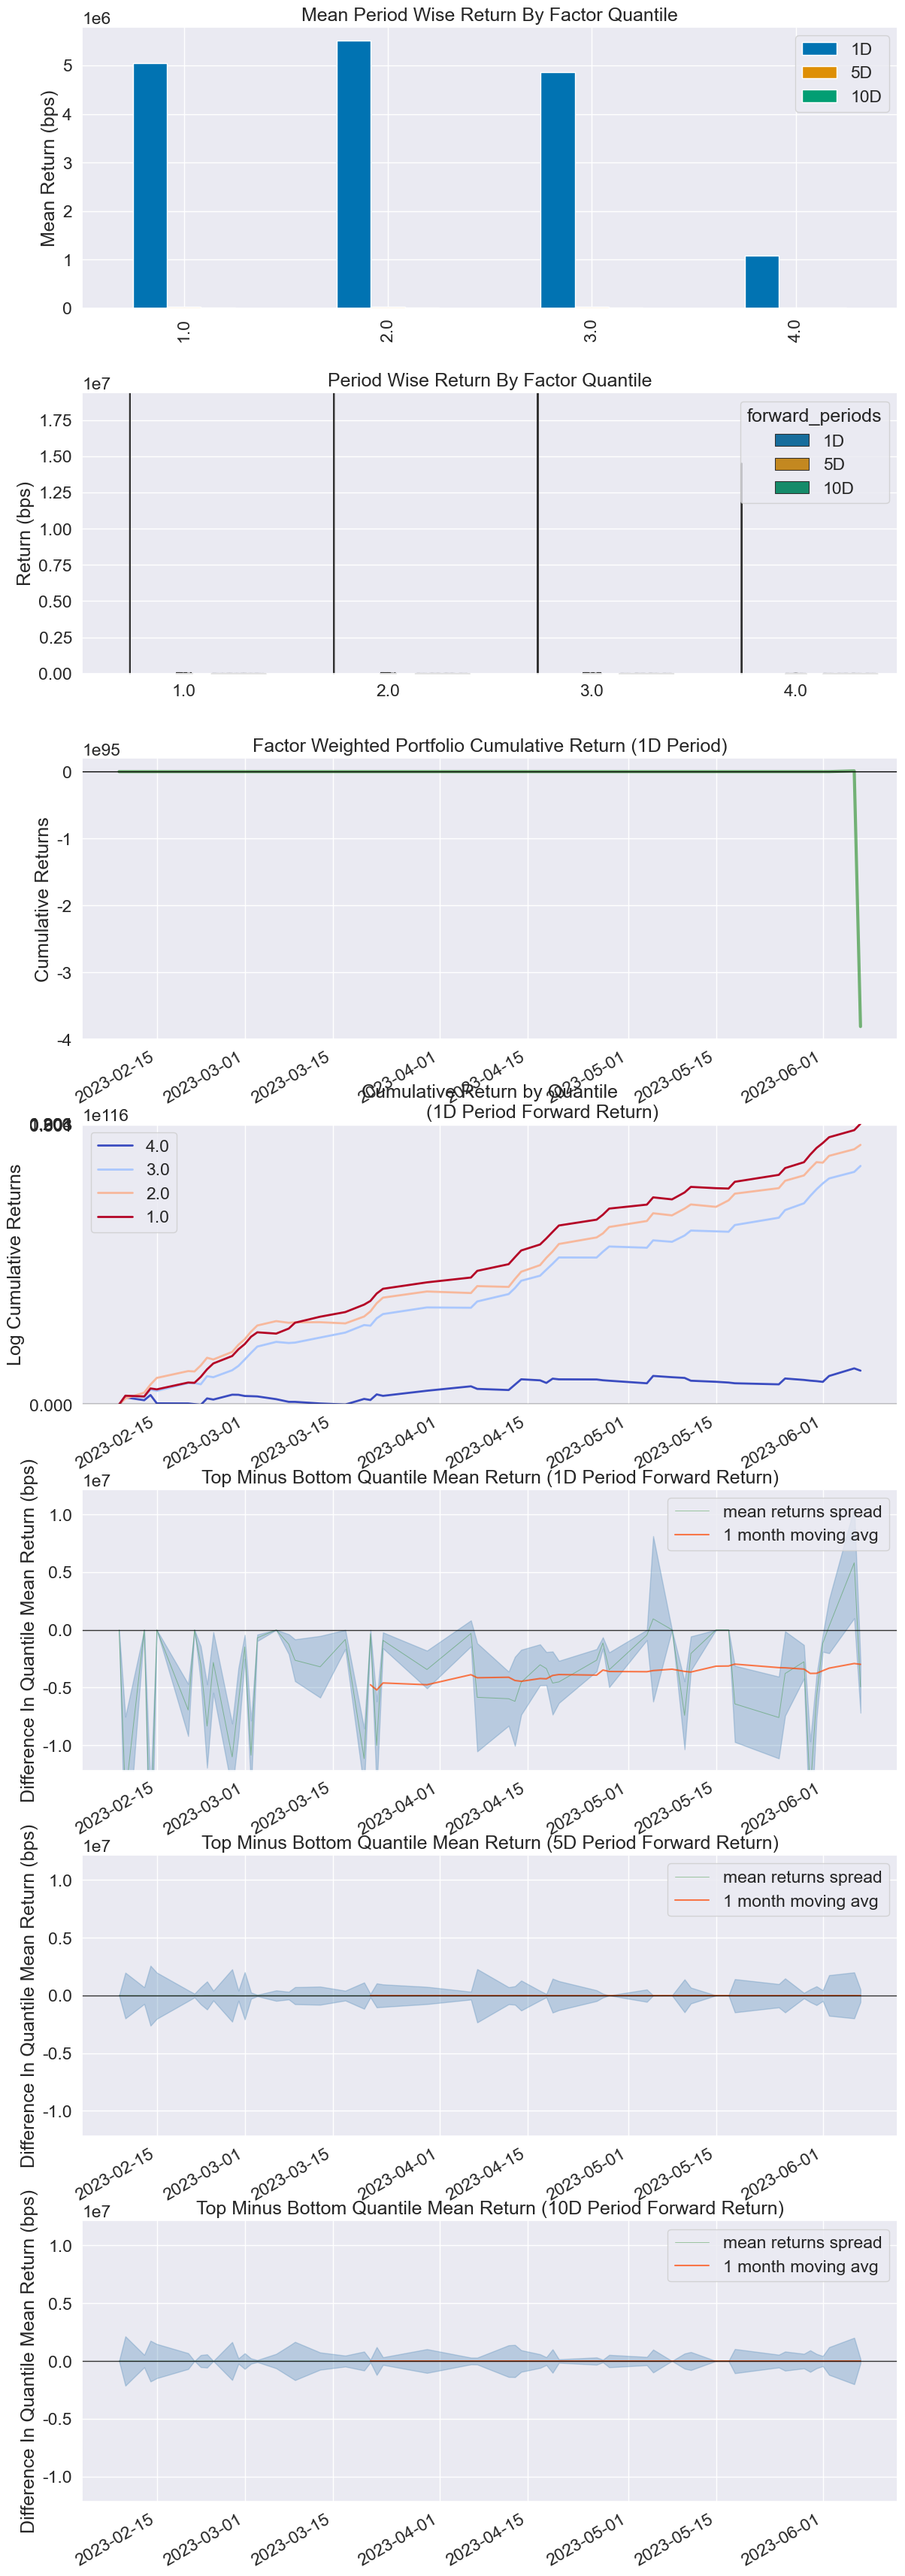

Information Analysis


,1D,5D,10D
IC Mean,-0.282,-0.272,-0.273
IC Std.,0.140,0.152,0.109
Risk-Adjusted IC,-2.022,-1.786,-2.509
t-stat(IC),-14.862,-13.127,-18.435
p-value(IC),0.000,0.000,0.000
IC Skew,0.191,0.322,-0.046
IC Kurtosis,-0.518,-0.478,-0.436


/home/disk1/quanttopian/alphalens/alphalens/plotting.py:217: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for a, (period_num, ic) in zip(ax, ic.iteritems()):
/home/disk1/quanttopian/alphalens/alphalens/plotting.py:275: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for a, (period_num, ic) in zip(ax, ic.iteritems()):
/home/disk1/quanttopian/alphalens/alphalens/plotting.py:276: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ic.replace(np.nan, 0.), norm_hist=True, ax=a)
/home/disk1/quanttopian/alphalens/alphalens/plotting.py:276: User

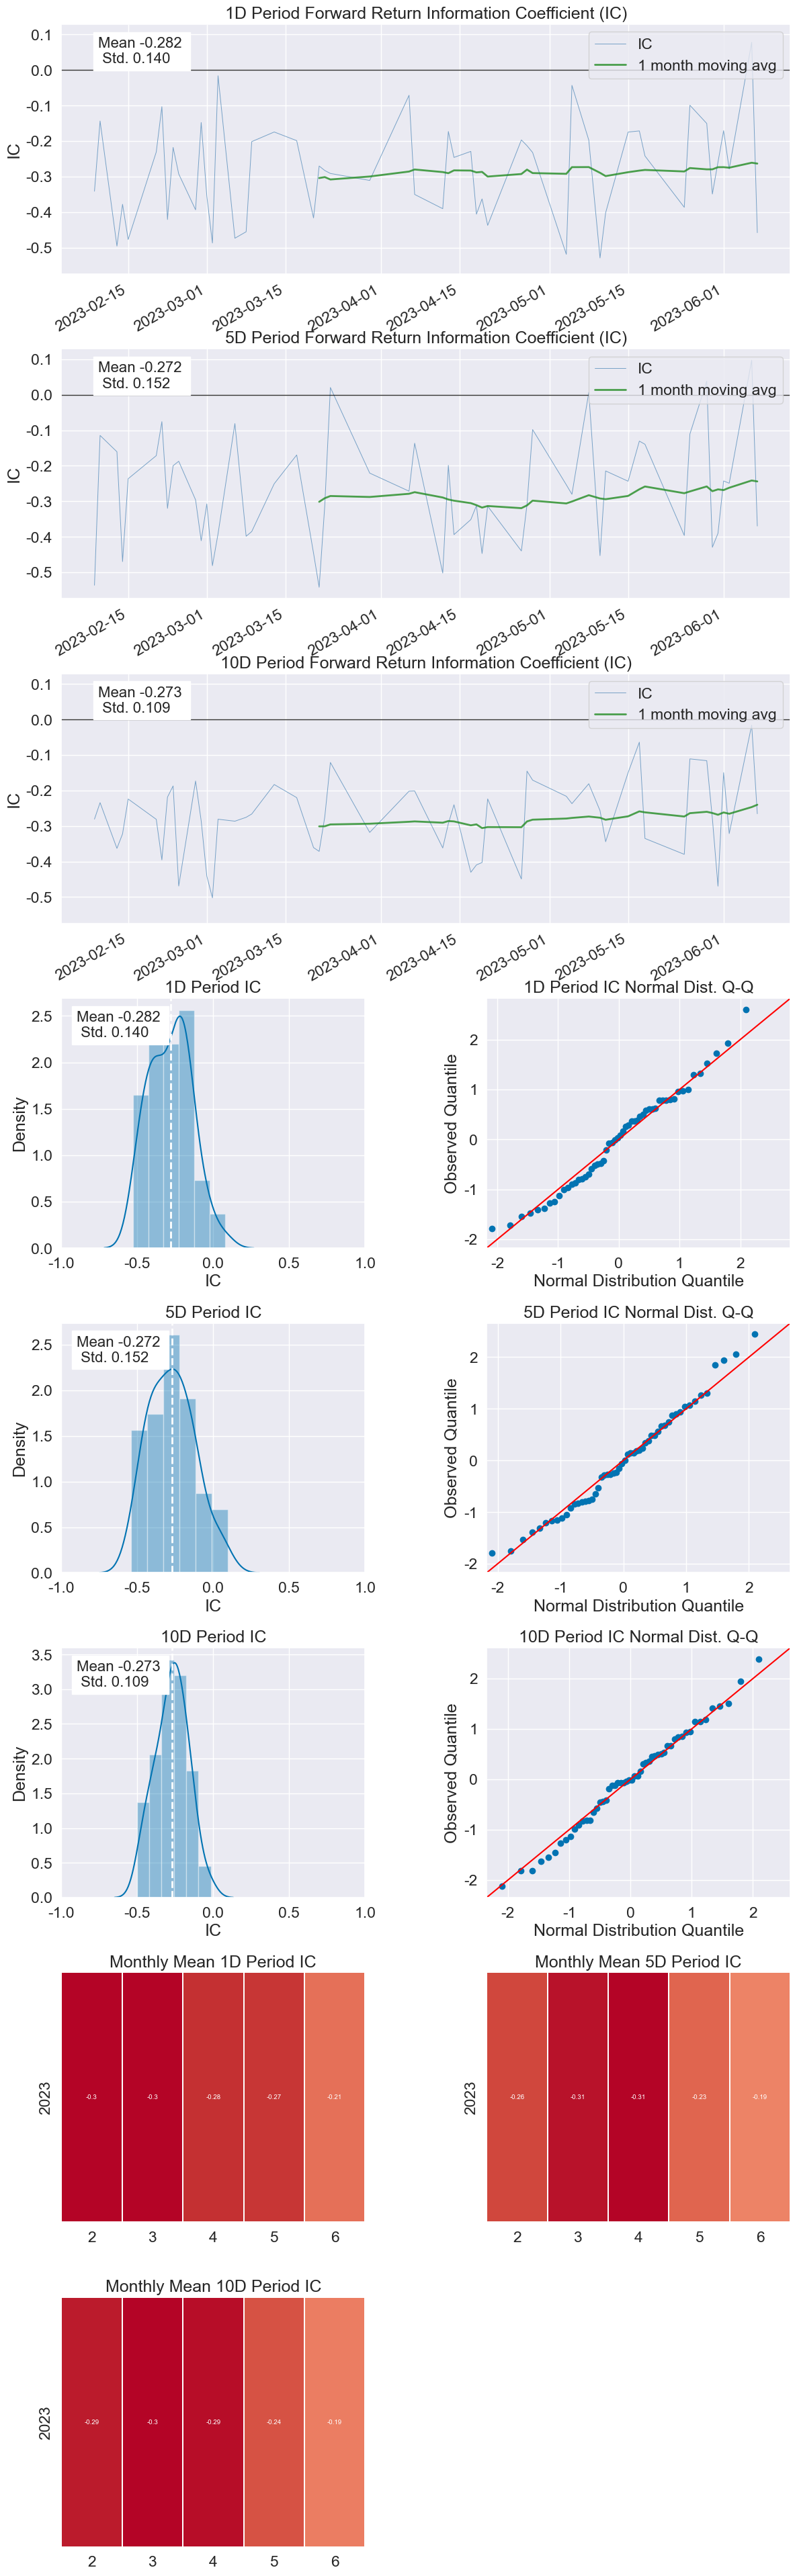

Turnover Analysis


/home/disk1/quanttopian/alphalens/alphalens/utils.py:910: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(
/home/disk1/quanttopian/alphalens/alphalens/plotting.py:153: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for quantile, p_data in quantile_turnover[period].iteritems():
/home/disk1/quanttopian/alphalens/alphalens/plotting.py:153: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for quantile, p_data in quantile_turnover[period].iteritems():
/home/disk1/quanttopian/alphalens/alphalens/plotting.py:153: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for quantile, p_data in quantile_turnover[period].iteritems():
/home/disk1/quanttopian/alphalens/alphalens/plotting.py:157: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for period

,1D,5D,10D
Quantile 1.0 Mean Turnover,0.469,0.428,0.428
Quantile 2.0 Mean Turnover,0.657,0.615,0.607
Quantile 3.0 Mean Turnover,0.658,0.616,0.630
Quantile 4.0 Mean Turnover,0.607,0.577,0.592


,1D,5D,10D
Mean Factor Rank Autocorrelation,0.213,0.281,0.265


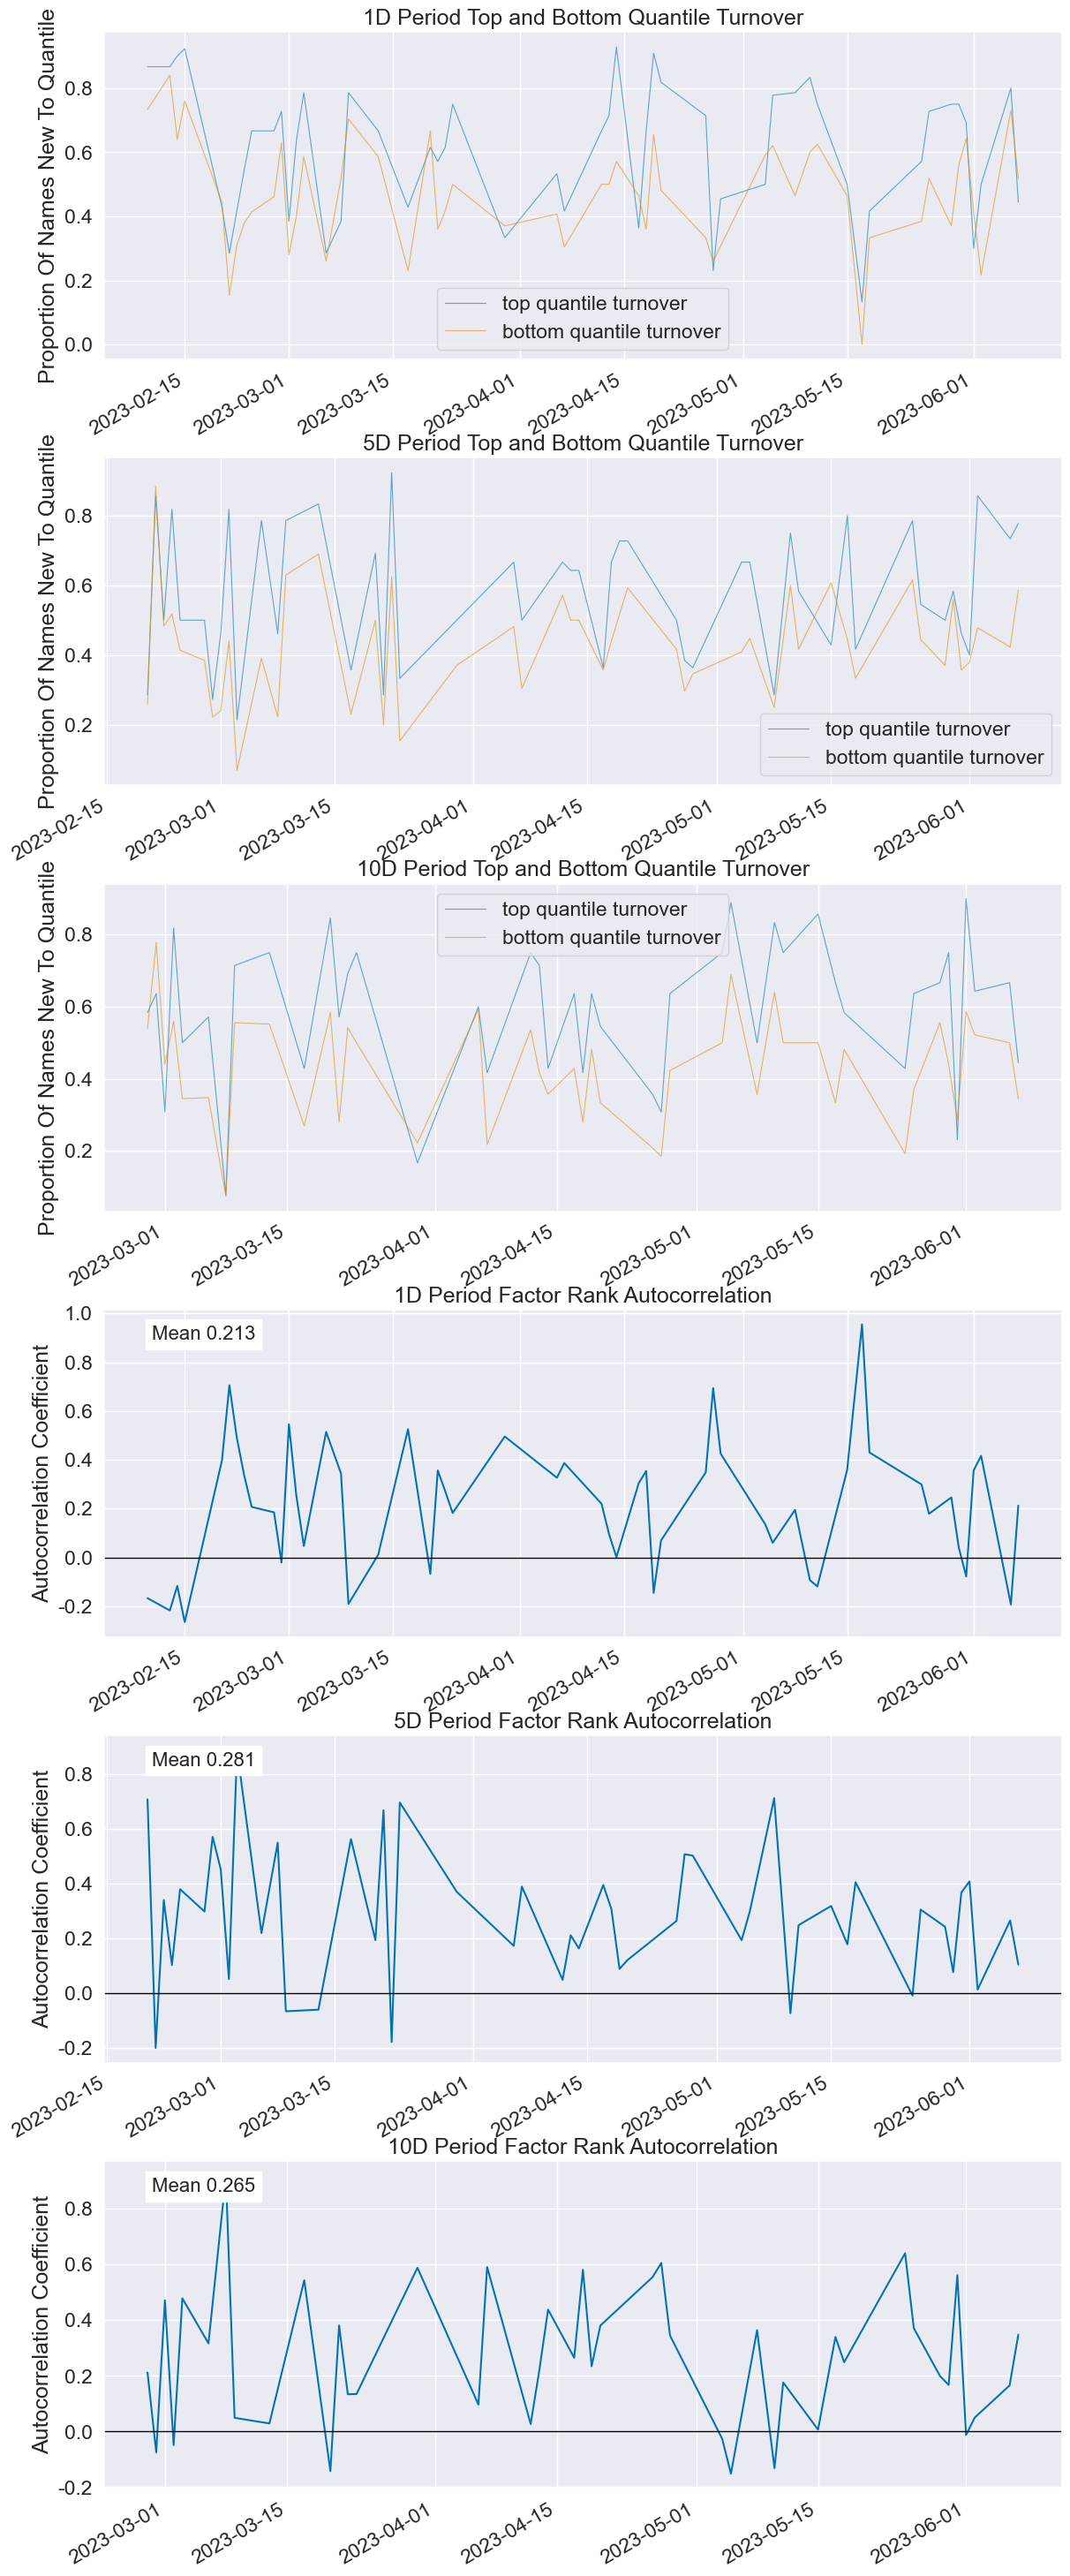

In [5]:
create_full_tear_sheet(factor_data, long_short=False, group_neutral=False, by_group=False)

/opt/quant/lib/python3.8/site-packages/alphalens/performance.py:712: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  series = returns.loc[returns.index[starting_index:ending_index],
/opt/quant/lib/python3.8/site-packages/alphalens/performance.py:712: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  series = returns.loc[returns.index[starting_index:ending_index],
/opt/quant/lib/python3.8/site-packages/alphalens/performance.py:712: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  series = returns.loc[returns.index[starting_index:ending_index],
/opt/quant/lib/python3.8/site-packages/alphalens/performance.py:712: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  series = returns.loc[returns.index[starting_index:ending_index],
/opt

<Figure size 640x480 with 0 Axes>

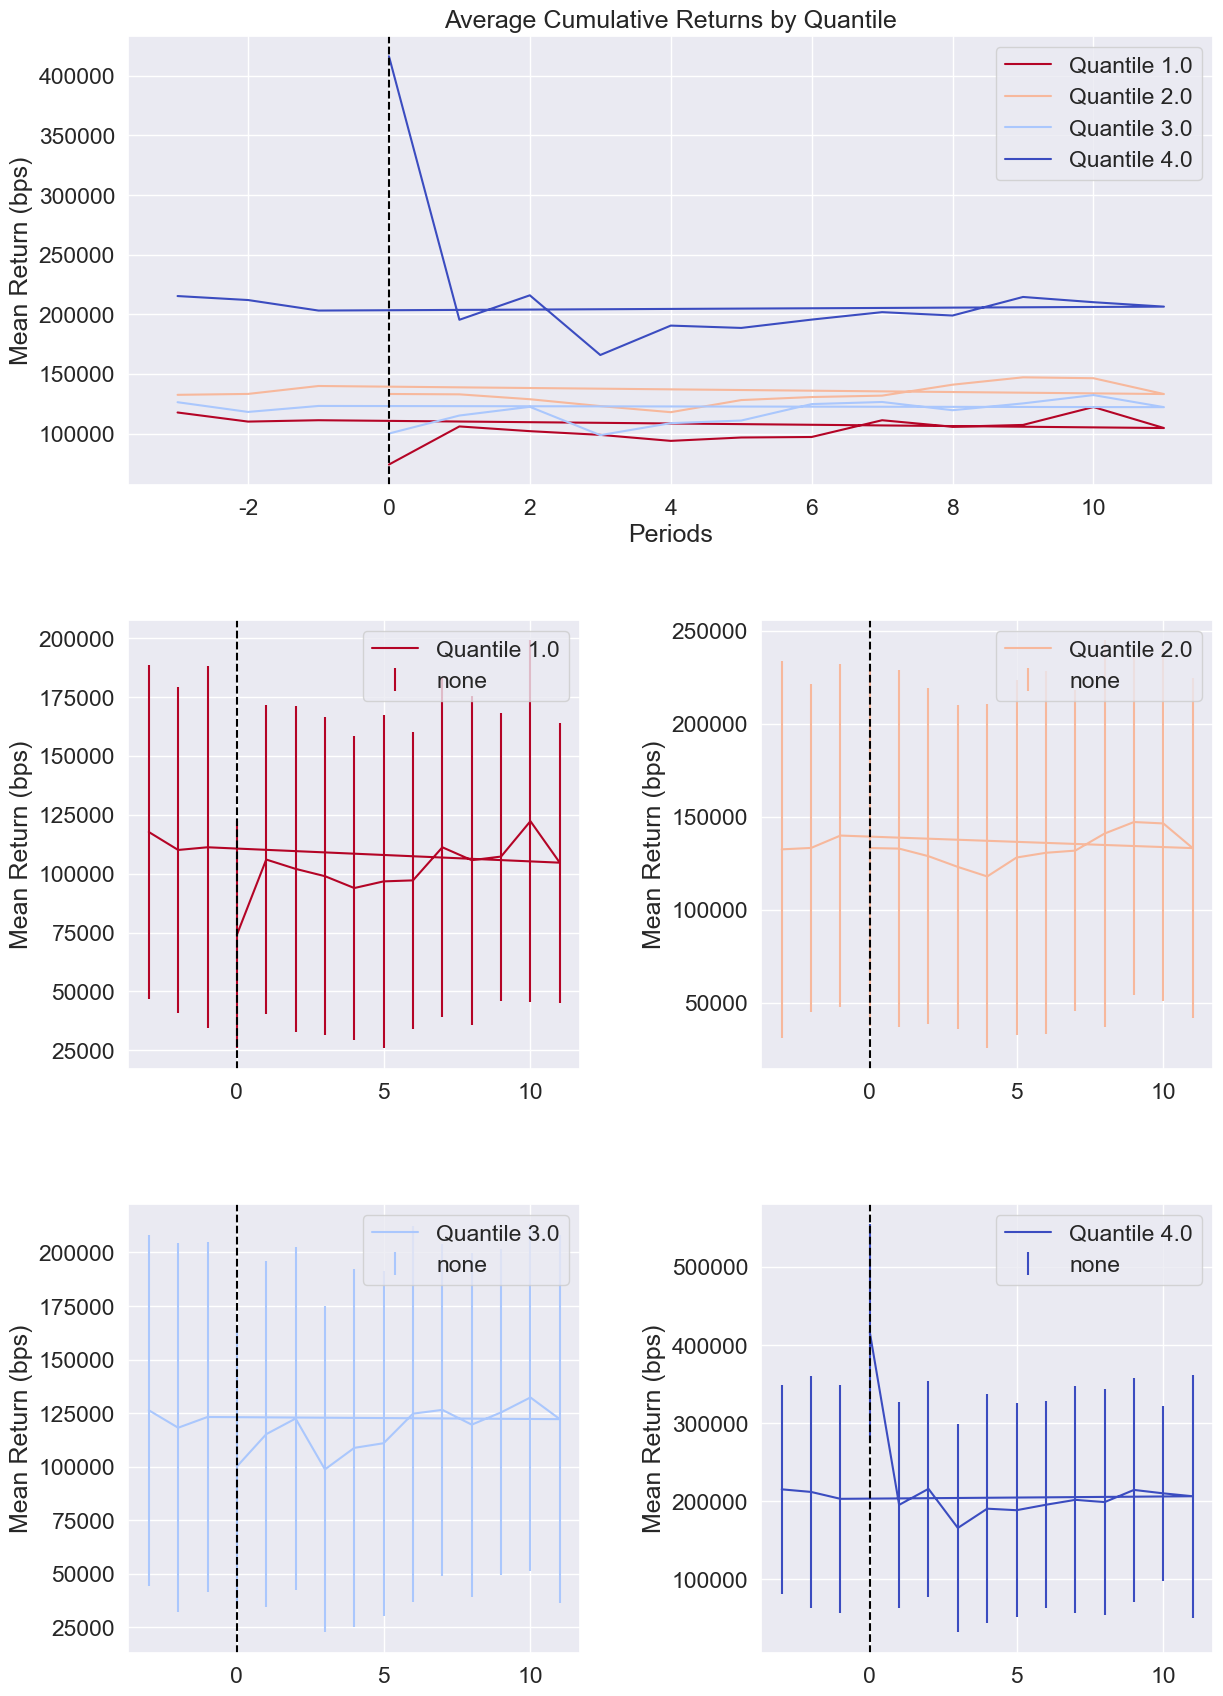

In [35]:
create_event_returns_tear_sheet(factor_data, prices, avgretplot=(3, 11),
                                long_short=False, group_neutral=False, by_group=False)

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1.0,-0.379756,-0.157200,-0.270846,0.111292,1410,42.896258
2.0,0.000000,0.033224,0.031694,0.006969,608,18.497110
3.0,0.033224,0.208083,0.206001,0.018981,588,17.888652
4.0,0.208083,0.397506,0.395559,0.019120,681,20.717980


Returns Analysis


/opt/quant/lib/python3.8/site-packages/alphalens/performance.py:199: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  weights = factor_data.groupby(grouper)['factor'] \
/opt/quant/lib/python3.8/site-packages/alphalens/performance.py:327: RuntimeWarning: invalid value encountered in double_scalars
  (1 + alpha) ** freq_adjust - 1
/opt/quant/lib/python3.8/site-packages/alphalens/plotting.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  returns_table = returns_table.append(alpha_beta)


,1D,5D,10D
Ann. alpha,2.066576e+283,1.168105e+68,NaN
beta,-3.010000e-01,-3.950000e-01,-0.300
Mean Period Wise Return Top Quantile (bps),-3.133177e+06,NaN,NaN
Mean Period Wise Return Bottom Quantile (bps),8.279970e+05,1.399280e+04,5985.331
Mean Period Wise Spread (bps),-3.961175e+06,8.950700e+02,44.807


/opt/quant/lib/python3.8/site-packages/alphalens/plotting.py:810: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axhline(1.0, linestyle='-', color='black', lw=1)
/opt/quant/lib/python3.8/site-packages/alphalens/plotting.py:502: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (i, a), (name, fr_column) in zip(enumerate(ax),


<Figure size 640x480 with 0 Axes>

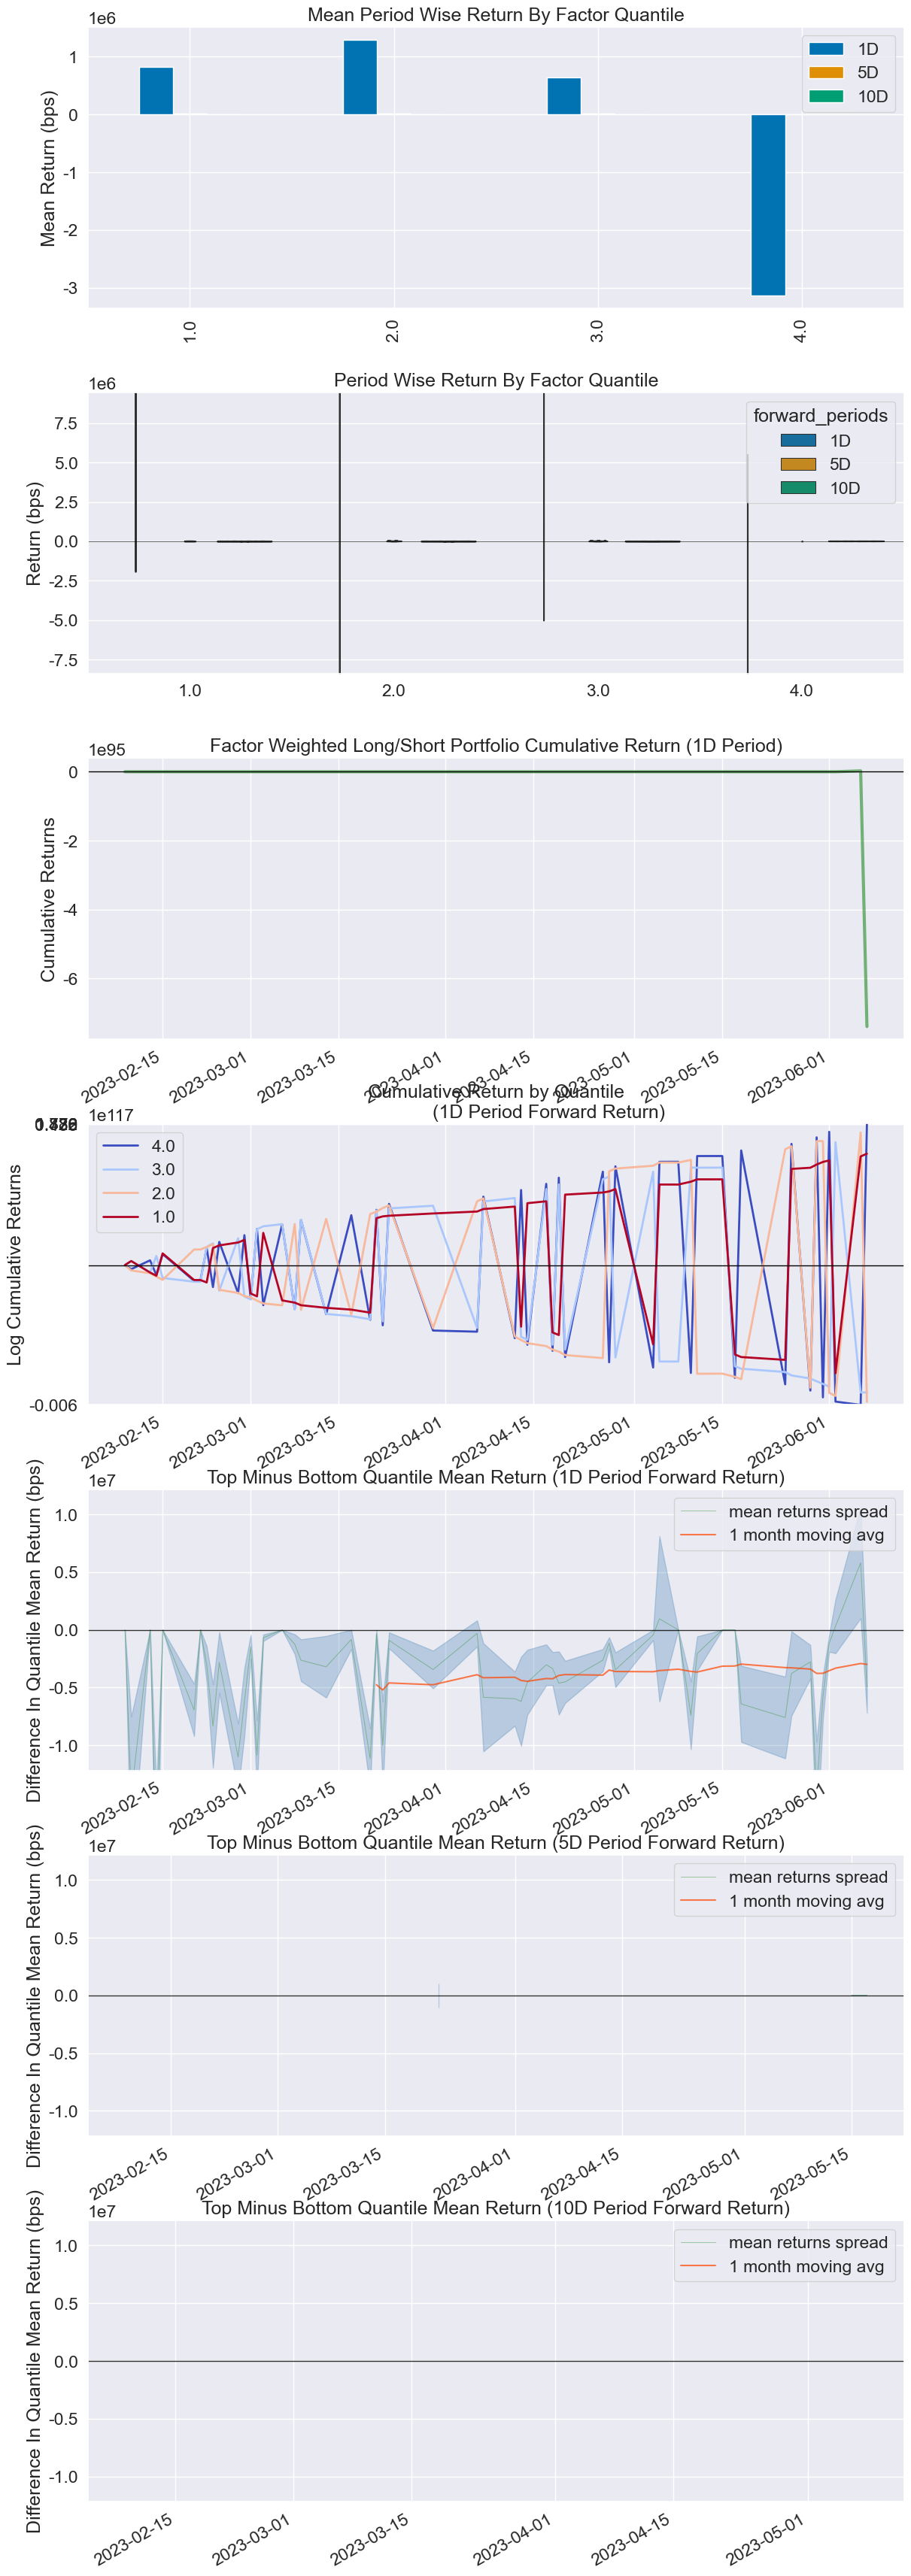

KeyError: 'group'

In [36]:
create_full_tear_sheet(factor_data, long_short=True, group_neutral=False, by_group=True)

/opt/quant/lib/python3.8/site-packages/alphalens/performance.py:712: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  series = returns.loc[returns.index[starting_index:ending_index],
/opt/quant/lib/python3.8/site-packages/alphalens/performance.py:712: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  series = returns.loc[returns.index[starting_index:ending_index],
/opt/quant/lib/python3.8/site-packages/alphalens/performance.py:712: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  series = returns.loc[returns.index[starting_index:ending_index],
/opt/quant/lib/python3.8/site-packages/alphalens/performance.py:712: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  series = returns.loc[returns.index[starting_index:ending_index],
/opt

<Figure size 640x480 with 0 Axes>

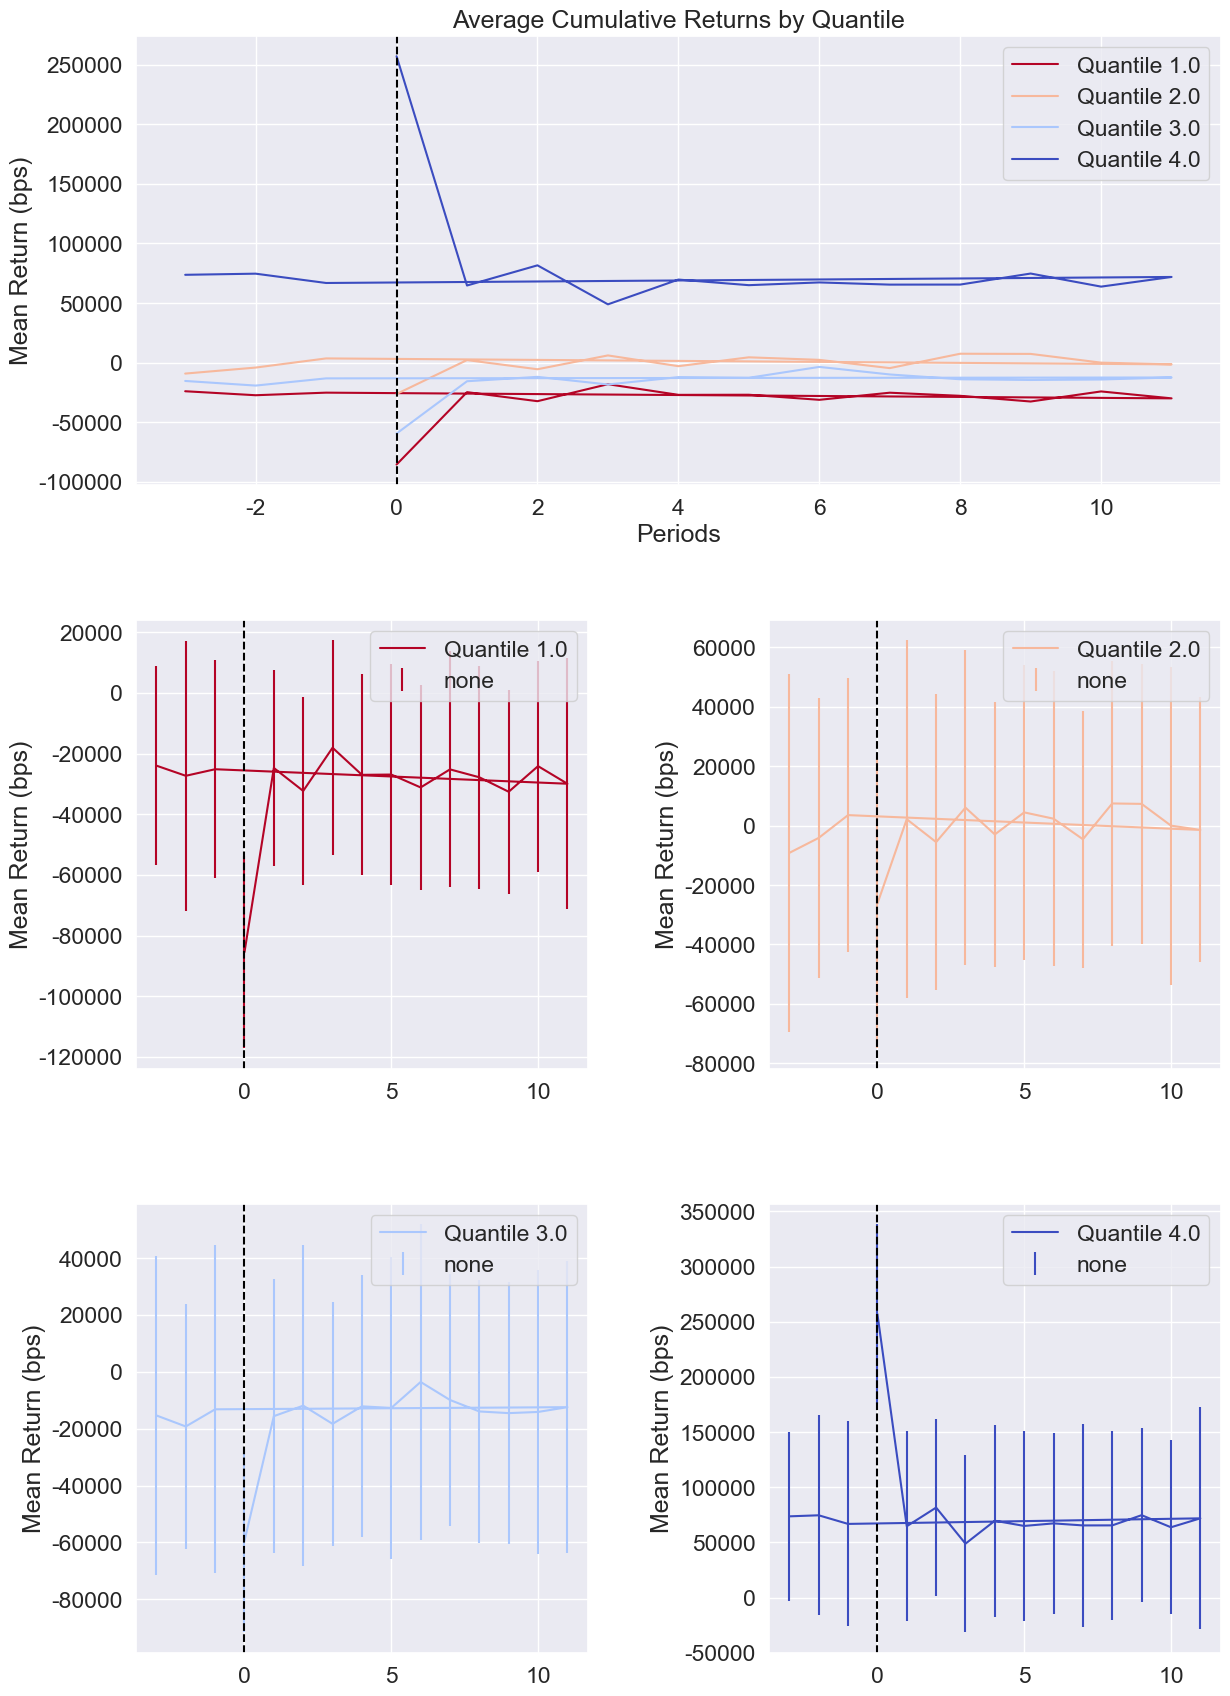

KeyError: 'group'

In [37]:
create_event_returns_tear_sheet(factor_data, prices, avgretplot=(3, 11),
                                long_short=True, group_neutral=False, by_group=True)